<a href="https://colab.research.google.com/github/tangomaxe/ML_Project_Tasks/blob/main/Task7_finalVer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Task 7 
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

own_data = pd.read_csv('/content/drive/MyDrive/MachineLearningProject/magnetization_train.csv')
own_data.dropna(axis = 0, inplace = True)
print(own_data.shape)
own_data.describe()


(42078, 274)


,mean_EffectiveCoordination,var_EffectiveCoordination,min_EffectiveCoordination,max_EffectiveCoordination,var_MeanBondLength,min_MeanBondLength,max_MeanBondLength,mean_BondLengthVariation,var_BondLengthVariation,min_BondLengthVariation,...,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,magnetization
count,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000,...,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000,42078.000000
mean,9.955201,1.154080,8.017448,11.672851,0.050764,0.898472,1.075737,0.095679,0.031112,0.040605,...,96.918437,122.656396,0.266371,0.228803,0.344595,0.160231,0.400898,0.391911,0.154506,1.274675
std,1.892005,0.866611,2.589830,2.590819,0.039933,0.097746,0.068670,0.066652,0.025969,0.054652,...,82.614795,89.220231,0.145956,0.191579,0.234759,0.211220,0.490086,0.295149,0.123980,3.490827
min,3.644150,0.000000,3.643525,3.644150,0.000000,0.335137,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.634780,0.166809,6.000000,10.385931,0.011364,0.828536,1.016992,0.051982,0.006645,0.006167,...,12.000000,12.000000,0.163043,0.045455,0.160000,0.000000,0.000000,0.118407,0.043034,0.000053
50%,10.467132,1.260921,7.099591,11.956922,0.050075,0.928970,1.066015,0.080327,0.028005,0.030829,...,64.000000,152.000000,0.250000,0.200000,0.316667,0.000000,0.000000,0.323366,0.115679,0.002386
75%,11.772359,1.843022,10.837237,12.477514,0.081473,0.983752,1.116672,0.127454,0.052367,0.051982,...,194.000000,204.333333,0.333333,0.390244,0.531915,0.304348,1.000000,0.701803,0.269995,0.705746
max,13.123931,5.032590,12.000000,26.285291,0.277331,1.000000,1.932962,0.724342,0.200209,0.698084,...,229.000000,229.000000,1.000000,0.714286,0.985915,0.873016,1.000000,0.921450,0.460725,44.981675


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

features = list(own_data)[2:-1]
properties = list(own_data)[-1]

X = own_data[features]
y = own_data[properties]
X_complete = own_data[list(own_data)[2: len(own_data)]]

#Removing all features with low Variances (< 0.05)
selector = VarianceThreshold(threshold = (0.95*(1-0.95)))
X = selector.fit_transform(X)
feature_index_own = selector.get_support()
feature_names_own = selector.get_feature_names_out()

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr

corr_spear = spearmanr(X).correlation

In [ ]:
from scipy.cluster import hierarchy
from seaborn import heatmap

correlation_linkage = hierarchy.ward(corr_spear)
cluster_ids_own = hierarchy.fcluster(correlation_linkage, t = 2, criterion = 'distance')

print(cluster_ids_own)

from collections import defaultdict
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids_own):
    cluster_id_to_feature_ids[cluster_id].append(idx)
print(cluster_id_to_feature_ids)
selected_features_own = [v[0] for v in cluster_id_to_feature_ids.values()]
print(selected_features_own)
print('number of features after correlation reduction:',len(selected_features_own))


[ 9 81  7 33 15 43 14 42 43 87 79 51 88 79 15 43 14 42 43 65 64 66 64 64
 87 80 51 88 80 45 44 46 45 44 85 78 86 85 78 75 75 75 80 47 31 48 48 76
 71 76 73 71 18 59 17 58 59 12 13  2 13 13 60 62 60 61 62 47 48 48 55 56
 55 57 56 36 37 29 37 37 10 10 10 10 10 40 39 41 39 39 50 49 53 50 49 63
 63 63 63 63 35 35 35 77 71 77 77 71 82  1 42 15 11  6  8 67 88 87 73 20
 74  1 42 15 11  6  8  4 64 65 38  4  4 67 88 87 73 20 74  1 45 45 11  6
  8  8 85 85 52  7  7 72 75 75 72 20 72 23 48 47 23 70 74 73 76 73 22 74
 16 58 18 18 26 16 12 13 12 13 32  2 19 61 60 60 21 19 47 48 48 31 68 57
 55 57 22 69 29 36 36 36 27 28 10 10 10 10 32 34 30 39 40 40 24 30 54 50
 50 52  5  5 63 63 63 63 63 35 35 35 35 25  3 77 77 84  3  3 16 83 75]
defaultdict(<class 'list'>, {9: [0], 81: [1], 7: [2, 149, 150], 33: [3], 15: [4, 14, 111, 123], 43: [5, 8, 15, 18], 14: [6, 16], 42: [7, 17, 110, 122], 87: [9, 24, 117, 135], 79: [10, 13], 51: [11, 26], 88: [12, 27, 116, 134], 65: [19, 129], 64: [20, 22, 23, 128], 66: [21

['mean_EffectiveCoordination', 'var_EffectiveCoordination', 'min_EffectiveCoordination', 'max_EffectiveCoordination', 'mean_NeighDiff_shell1_Number', 'var_NeighDiff_shell1_Number', 'min_NeighDiff_shell1_Number', 'max_NeighDiff_shell1_Number', 'mean_NeighDiff_shell1_MendeleevNumber', 'var_NeighDiff_shell1_MendeleevNumber', 'min_NeighDiff_shell1_MendeleevNumber', 'max_NeighDiff_shell1_MendeleevNumber', 'mean_NeighDiff_shell1_MeltingT', 'var_NeighDiff_shell1_MeltingT', 'min_NeighDiff_shell1_MeltingT', 'var_NeighDiff_shell1_Column', 'mean_NeighDiff_shell1_Row', 'var_NeighDiff_shell1_Row', 'min_NeighDiff_shell1_Row', 'mean_NeighDiff_shell1_CovalentRadius', 'var_NeighDiff_shell1_CovalentRadius', 'min_NeighDiff_shell1_CovalentRadius', 'mean_NeighDiff_shell1_Electronegativity', 'mean_NeighDiff_shell1_NsValence', 'min_NeighDiff_shell1_NsValence', 'max_NeighDiff_shell1_NsValence', 'mean_NeighDiff_shell1_NpValence', 'var_NeighDiff_shell1_NpValence', 'max_NeighDiff_shell1_NpValence', 'mean_NeighDi

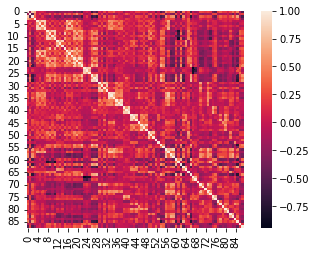

In [ ]:
import seaborn as sb

final_selected_features = []
for i in range(len(selected_features_own)):
  final_selected_features.append(feature_names_own[selected_features_own[i]])

print(final_selected_features)
print(len(final_selected_features))

X_red = X[:, selected_features_own]
red_corr_spear = spearmanr(X_red).correlation

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_red, y)

sb.heatmap(red_corr_spear, square = True)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

skb = SelectKBest(score_func = f_regression, k = 'all')
est_ranfor = RandomForestRegressor(random_state = 0)
pipe_ranfor = Pipeline([('SKB', skb), ('forest', est_ranfor)])


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_red, y, random_state = 0, test_size = .2)
pipe_ranfor.fit(X_train, y_train)

Pipeline(steps=[('SKB',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x7f5208eb6170>)),
                ('forest', RandomForestRegressor(random_state=0))])

In [ ]:
from typing_extensions import ParamSpec
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_red, y, random_state = 0, test_size = .2)

param_gridSearch_ranfor = {
  'forest__n_estimators':  [200],
  'forest__min_samples_leaf': [2],
  'forest__max_features': ['sqrt'],
  'forest__max_depth': [10, 15, 20],
  'forest__min_samples_split': [2],
  'forest__max_samples': [None]
}
'''{'forest__max_depth': 15, 'forest__max_features': 'sqrt', 'forest__max_samples': None, 'forest__min_samples_leaf': 2, 'forest__min_samples_split': 2, 'forest__n_estimators': 200}'''
gridSearch_ranfor = GridSearchCV(estimator = pipe_ranfor, param_grid = param_gridSearch_ranfor, cv = 10, verbose = 3)

gridSearch_ranfor.fit(X_train, y_train)
print('nRandomForest:', gridSearch_ranfor.best_score_)
print(gridSearch_ranfor.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10] END forest__max_depth=10, forest__max_features=sqrt, forest__max_samples=None, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200;, score=0.594 total time=  29.3s
[CV 2/10] END forest__max_depth=10, forest__max_features=sqrt, forest__max_samples=None, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200;, score=0.541 total time=  29.1s
[CV 3/10] END forest__max_depth=10, forest__max_features=sqrt, forest__max_samples=None, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200;, score=0.552 total time=  29.2s
[CV 4/10] END forest__max_depth=10, forest__max_features=sqrt, forest__max_samples=None, forest__min_samples_leaf=2, forest__min_samples_split=2, forest__n_estimators=200;, score=0.524 total time=  29.3s
[CV 5/10] END forest__max_depth=10, forest__max_features=sqrt, forest__max_samples=None, forest__min_samples_leaf=2, forest

In [ ]:
est_rf_own = RandomForestRegressor(min_samples_split = 2, min_samples_leaf = 2, n_estimators = 150, max_depth = 20, max_features = 'sqrt', bootstrap = True, warm_start = True)
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size = 0.1)

'''index = len(X_split)
best_result_arr = [0]*index
best_state_arr = [0]*index
ran_arr = [0]*index'''
 
best_result = -10
best_state = -1
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size = 0.2, random_state = i)
    est_rf_own.fit(X_train, y_train)
    result=est_rf_own.score(X_test, y_test)
    if result>best_result:
        best_result = result
        state = i
        est_rf_own.n_estimators += 2

print(best_result)
print(i)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:430: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  "Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:430: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  "Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:430: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  "Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:430: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  "Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:430: UserWarning: Warm-start fitt

0.8759255777747291
499


In [ ]:
rf_pred = est_rf_own.set_params(random_state = state)

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_pred, X_red, y) # please fill here

print(result)
perm_sorted_idx = result.importances_mean.argsort()

print(perm_sorted_idx)

{'importances_mean': array([1.14929124e-02, 9.02878372e-03, 1.37445898e-02, 2.21795390e-02,
       9.29770880e-03, 6.99507451e-03, 7.66620866e-03, 1.17131017e-02,
       1.41444873e-02, 9.12324034e-03, 1.12731048e-02, 1.26934163e-02,
       1.11695266e-02, 8.58045509e-03, 9.75597738e-03, 1.05781747e-02,
       7.94899080e-03, 7.30917452e-03, 8.40510208e-03, 1.22965875e-02,
       8.17550354e-03, 1.43626901e-02, 2.61140355e-02, 5.07657167e-03,
       2.11113846e-03, 4.92949380e-03, 4.66031333e-02, 7.50568175e-03,
       2.21851348e-02, 1.32761330e-02, 1.10196978e-02, 8.25765468e-03,
       1.17237145e-02, 1.37234694e-02, 1.90164370e-02, 8.07874059e-03,
       4.53200229e-02, 1.28237352e-02, 1.55817140e-02, 7.80915527e-03,
       1.01400274e-02, 7.45252503e-03, 4.01142603e-02, 4.65679776e-02,
       1.35066824e-02, 6.35297701e-02, 2.42242249e-02, 1.79528872e-02,
       1.04159754e-02, 1.75544719e-02, 1.43436845e-02, 5.63030242e-02,
       4.90531478e-03, 1.19221416e-01, 3.06680956e-02, 1

['min_NpValence', 'most_NsValence', 'min_NdUnfilled', 'min_NfValence', 'min_NdValence', 'most_NpUnfilled', 'min_NeighDiff_shell1_NsValence', 'min_NUnfilled', 'mean_NsValence', 'min_Number', 'mean_NeighDiff_shell1_GSbandgap', 'max_NeighDiff_shell1_NsValence', 'mean_NeighDiff_shell1_NsValence', 'most_NdUnfilled', 'var_NeighDiff_shell1_Number', 'var_NeighDiff_shell1_Row', 'max_NeighDiff_shell1_NpUnfilled', 'var_NeighDiff_shell1_NpValence', 'min_NeighDiff_shell1_Number', 'mean_NeighDiff_shell1_NpUnfilled', 'mean_NeighDiff_shell1_Row', 'min_NeighDiff_shell1_NfValence', 'var_NeighDiff_shell1_CovalentRadius', 'min_NeighDiff_shell1_NdValence', 'min_NeighDiff_shell1_Row', 'var_NeighDiff_shell1_MeltingT', 'var_EffectiveCoordination', 'mean_NpUnfilled', 'var_NeighDiff_shell1_MendeleevNumber', 'mean_NeighDiff_shell1_Number', 'min_NeighDiff_shell1_MeltingT', 'var_NeighDiff_shell1_NpUnfilled', 'min_NeighDiff_shell1_NUnfilled', 'var_NeighDiff_shell1_Column', 'var_NeighDiff_shell1_NdValence', 'mean_Ne

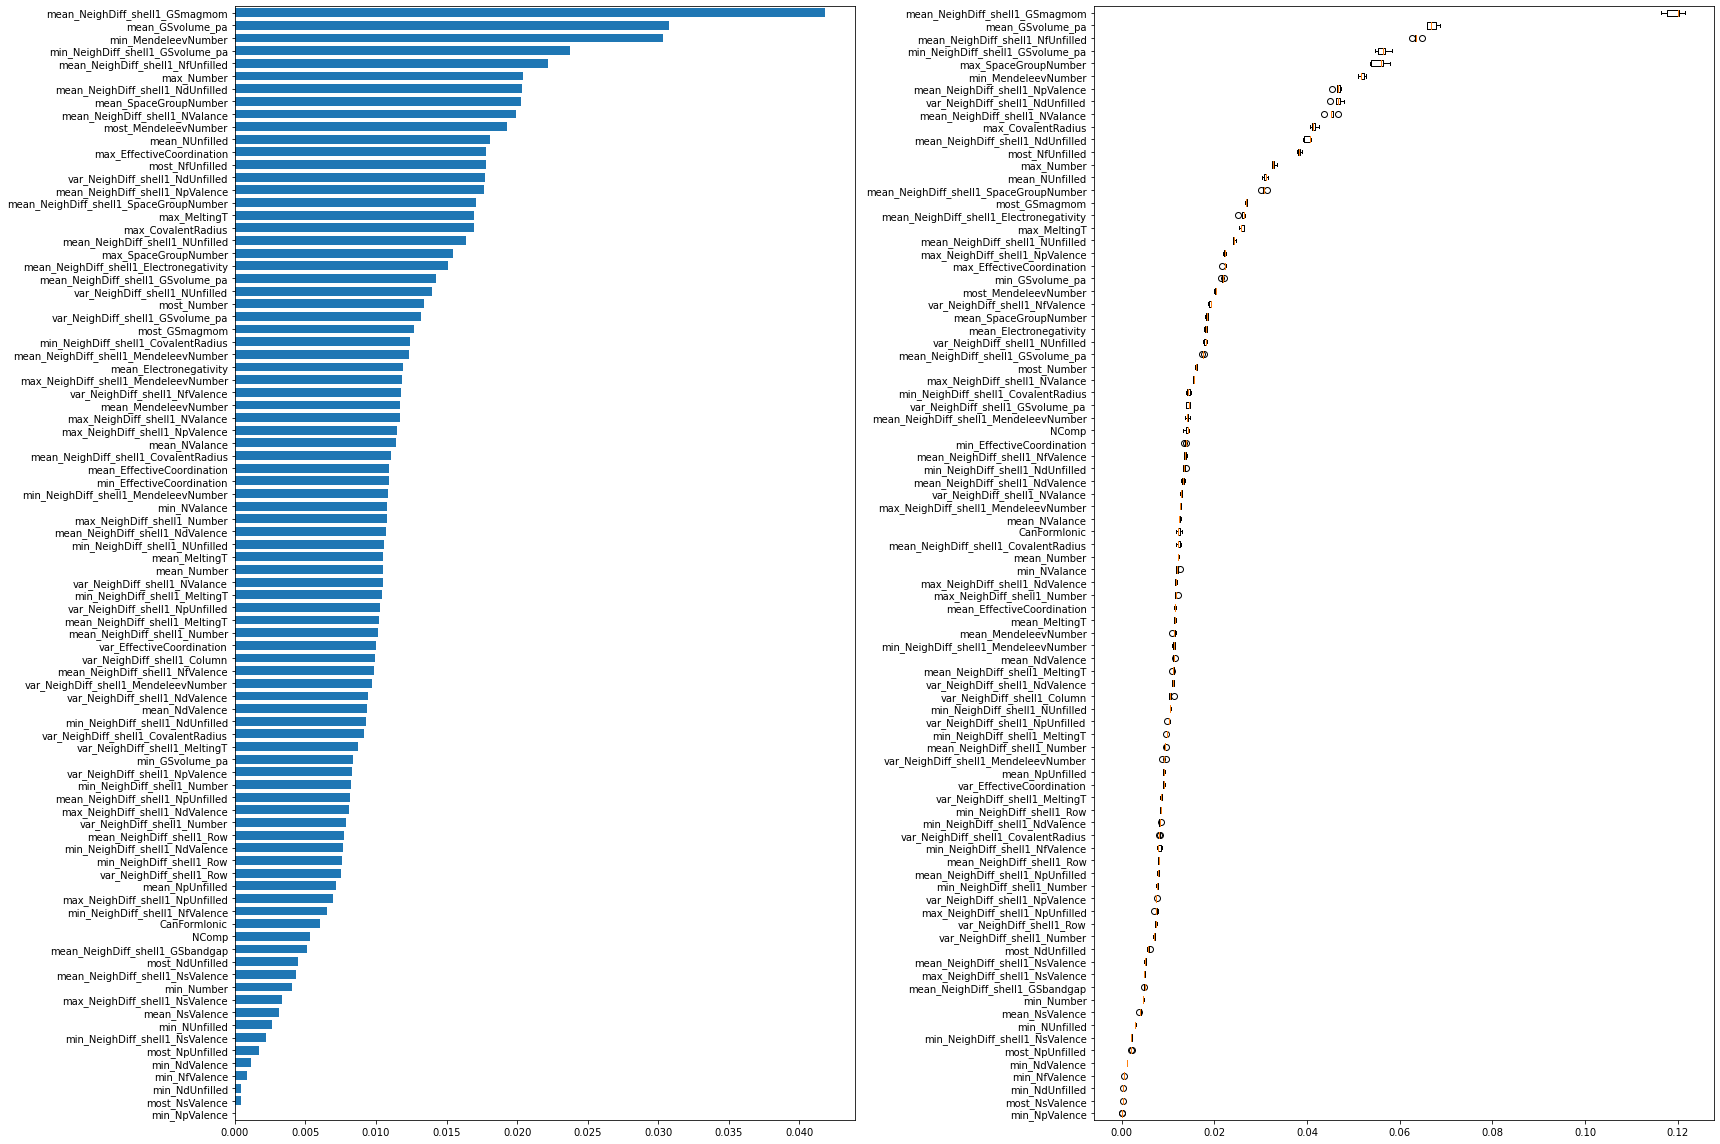

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

tree_importance_sorted_idx = np.argsort(rf_pred.feature_importances_)
tree_indices = np.arange(0, len(rf_pred.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16))
ax1.barh(tree_indices, rf_pred.feature_importances_[tree_importance_sorted_idx], height=0.7)

ylabels=[]
for i in range(len(tree_importance_sorted_idx)):
    #ylabels.append(final_features[i])
    ylabels.append(feature_names_own[selected_features_own[tree_importance_sorted_idx[i]]]) 
    'Right or Wrong ? Error before this or wrong from the beginning ?'

ax1.set_yticklabels(ylabels)
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(rf_pred.feature_importances_)))

labels=[]
for i in range(len(perm_sorted_idx)):
    labels.append(feature_names_own[selected_features_own[perm_sorted_idx[i]]])

#print(result.importances[perm_sorted_idx].shape)
print(labels,tree_importance_sorted_idx,est_rf_own.feature_importances_)

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels = labels)
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf_pred, threshold = 0.018, prefit = True)

selected_features_model = []
for feature_list_index in sfm.get_support(indices=True):
    print(selected_features_own[feature_list_index])
    selected_features_model.append(features[selected_features_own[feature_list_index]])

print(selected_features_model)

X_important_features = sfm.transform(X_red)
print(X_important_features.shape)

62
75
80
92
100
112
119
120
208
214
230
['var_NeighDiff_shell1_NpValence', 'range_NeighDiff_shell1_NfValence', 'range_NeighDiff_shell1_NValance', 'var_NeighDiff_shell1_NdUnfilled', 'range_NeighDiff_shell1_NfUnfilled', 'var_NeighDiff_shell1_GSbandgap', 'max_NeighDiff_shell1_GSmagmom', 'range_NeighDiff_shell1_GSmagmom', 'min_NValance', 'min_NsUnfilled', 'dev_NfUnfilled']
(42078, 11)


In [ ]:

for feature in zip(selected_features_own, rf_pred.feature_importances_): 
    print(feature)

important_features_final = []
for feature_list_index in sfm.get_support(indices=True):
    print(selected_features_own[feature_list_index])
    important_features_final.append(features[feature_list_index])

print(important_features_final)

final_index = sfm.get_support(indices=True)
print(final_index)
feature_index = [selected_features_own[i] for i in final_index]
selected_feature_names  = [final_selected_features[i] for i in final_index]
print(len(important_features_final))

(0, 0.010940547168161128)
(1, 0.00999147232033421)
(2, 0.01091980316776414)
(3, 0.017824141880711533)
(4, 0.01013789482366561)
(5, 0.007887775236952176)
(6, 0.008251646111744408)
(7, 0.01077799855203625)
(9, 0.012308477549141569)
(10, 0.009718160413145499)
(11, 0.010859197631255474)
(12, 0.011842105717372344)
(19, 0.010228572380805765)
(20, 0.008699971936019867)
(21, 0.010410366738811822)
(25, 0.009945045856875149)
(29, 0.007712322320820085)
(30, 0.007538356121481529)
(31, 0.00761555305816827)
(34, 0.01108043762457932)
(35, 0.009134572810343331)
(36, 0.012434923806235662)
(39, 0.015064713956929621)
(43, 0.004333089262313569)
(44, 0.0021865426924031132)
(45, 0.0033361591387606722)
(47, 0.017624076893238787)
(48, 0.00830377600739167)
(50, 0.011491607933568083)
(52, 0.010713906257593667)
(53, 0.009429604463952426)
(54, 0.007642500374616004)
(55, 0.008106972986344529)
(57, 0.009864131824199594)
(58, 0.011786795374756198)
(59, 0.0065410525868378235)
(62, 0.01993127488744634)
(63, 0.01047061

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size = 0.2, random_state = 499 )
score = rf_pred.score(X_test, y_test)
y_pred = rf_pred.predict(X_test)

cv_results = cross_validate(rf_pred, X_test, y_test, cv = 10, n_jobs = -1, return_train_score = True)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(cv_results['test_score'])
print(cv_results['train_score'])
print(mse)
print(r2)

[0.39979594 0.48143862 0.50230676 0.40698093 0.52060793 0.62745096
 0.37084901 0.5465211  0.4267965  0.53679788]
[0.86748712 0.86365633 0.86196744 0.86685396 0.85820172 0.85618037
 0.86727565 0.86110969 0.8635851  0.8634915 ]
1.7993300059675132
0.8523686653288957


In [ ]:
rf_again = RandomForestRegressor(min_samples_split = 2, min_samples_leaf = 2, n_estimators = 150, max_depth = 20, max_features = 'sqrt', bootstrap = True, warm_start = True)

best_result = -10
best_state = -1
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X_important_features, y, test_size = 0.2, random_state = i)
    rf_again.fit(X_train, y_train)
    result=rf_again.score(X_test, y_test)
    if result>best_result:
        best_result = result
        state = i
        rf_again.n_estimators += 1

print(best_result)
print(i)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:430: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  "Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:430: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  "Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:430: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  "Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:430: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  "Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:430: UserWarning: Warm-start fitt

0.8499598239301118
499


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_important_features, y, test_size = 0.2, random_state = 499 )
score = rf_again.score(X_test, y_test)
y_pred = rf_again.predict(X_test)

cv_results = cross_validate(rf_again, X, y, cv = 10, n_jobs = -1, return_train_score = True)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(cv_results['test_score'])
print(cv_results['train_score'])
print(mse)
print(r2)

[0.64939061 0.62506724 0.65562921 0.68121239 0.66190645 0.67630067
 0.65750485 0.65415157 0.64082329 0.6573377 ]
[0.91313923 0.91431518 0.91313475 0.91388705 0.91329466 0.91369225
 0.91386671 0.91289181 0.91326922 0.91416733]
2.166544566774785
0.8222394641579907


In [ ]:
import os
import joblib
import sklearn.pipeline

rf_pred = rf_again

filename_WholeDataset = "trained_rf_MH.joblib"
name = os.path.join('/content', filename_WholeDataset)
dumped_model = joblib.dump(rf_pred, open(filename_WholeDataset, 'wb'))


pipeline_RF = Pipeline([('VarianceThreshold', selector), ('RF', rf_pred)])
pipeline_FS = Pipeline([('VarianceThreshold', selector), ('SFM', sfm)])

pipelineRF_filename = 'Pipeline_RF_MH.joblib'
path_pipe = os.path.join('/content', pipelineRF_filename)

pipelineFS_filename = 'Pipeline_FS_MH.joblib'
path_pipeFS = os.path.join('/content', pipelineFS_filename)

os.path.join('/content', pipelineRF_filename)
dump_RF = joblib.dump(pipeline_RF, open(pipelineRF_filename, 'wb'))

os.path.join('/content', pipelineFS_filename)
dump_FS = joblib.dump(pipeline_FS, open(pipelineFS_filename, 'wb'))

text = 'important_features.txt'
name = os.path.join('/content', text)

datei = open('/content/important_features.txt', 'w')
for i in range(len(selected_features_model)):
  datei.write(selected_features_model[i])
  datei.write('\n')

datei.close()